# Atividade 8
# Discente: Victor Gabriel Ferreira Barbosa

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sb
from lime.lime_tabular import LimeTabularExplainer


In [2]:
churn_df = pd.read_csv("Churn_Modelling.csv")

In [3]:
churn_df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

# Preparando os dados

Fonte: https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling/data

## Conjunto de dados de Churn de clientes de um banco

- RowNumber: Número da linha no arquivo.
- CustomerId: Identificador unico para cada cliente do banco.
- Surname: Último nome do cliente.
- CreditScore: Pontuação de crédito do cliente.
- Geography: O pais no qual o cliente reside.
- Gender: Gênero.
- Age: idade.
- Tenure: Número de anos que o cliente utiliza serviços do banco.
- Balance: Saldo bancário do cliente.
- NumOfProducts: Número de produtos do banco que o cliente esta utilizando.
- HasCrCard: Se o cliente possui um cartão de credito do banco.
- IsActiveMember: Se o cliente é um membro ativo.
- EstimatedSalary: Salario estimado do cliente em dolares.
- Exited: Se o cliente encerrou a conta com o banco (Churn).

## Transformando variaveis categoricas

In [4]:
gender_one_hot = pd.get_dummies(churn_df["Gender"], drop_first=True)

In [5]:
churn_df = churn_df.drop(columns=["Gender"])

In [6]:
churn_df["Male"] = gender_one_hot["Male"]

In [7]:
geo_one_hot = pd.get_dummies(churn_df["Geography"], drop_first=True)

In [8]:
churn_df = churn_df.drop(columns=["Geography"])

In [9]:
churn_df["Germany"] = geo_one_hot["Germany"]
churn_df["Spain"] = geo_one_hot["Spain"]

In [10]:
churn_df

RowNumber  CustomerId    Surname  CreditScore  Age  Tenure    Balance  \
0             1    15634602   Hargrave          619   42       2       0.00   
1             2    15647311       Hill          608   41       1   83807.86   
2             3    15619304       Onio          502   42       8  159660.80   
3             4    15701354       Boni          699   39       1       0.00   
4             5    15737888   Mitchell          850   43       2  125510.82   
...         ...         ...        ...          ...  ...     ...        ...   
9995       9996    15606229   Obijiaku          771   39       5       0.00   
9996       9997    15569892  Johnstone          516   35      10   57369.61   
9997       9998    15584532        Liu          709   36       7       0.00   
9998       9999    15682355  Sabbatini          772   42       3   75075.31   
9999      10000    15628319     Walker          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  Male  \
0                 1          1               1        101348.88       1     0   
1                 1          0               1        112542.58       0     0   
2                 3          1               0        113931.57       1     0   
3                 2          0               0         93826.63       0     0   
4                 1          1               1         79084.10       0     0   
...             ...        ...             ...              ...     ...   ...   
9995              2          1               0         96270.64       0     1   
9996              1          1               1        101699.77       0     1   
9997              1          0               1         42085.58       1     0   
9998              2          1               0         92888.52       1     1   
9999              1          1               0         38190.78       0     0   

      Germany  Spain  
0           0      0  
1           0      1  
2           0      0  
3           0      0  
4           0      1  
...       ...    ...  
9995        0      0  
9996        0      0  
9997        0      0  
9998        1      0  
9999        0      0  

[10000 rows x 15 columns]

## Removendo campos dispensaveis para o treinamento

As features abaixo são apenas identificadores para cada consumidor e não agregam informação na classificação.

In [11]:
churn_df = churn_df.drop(columns=["CustomerId", "Surname", "RowNumber"])

In [12]:
churn_df

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Male  Germany  Spain  
0                  1        101348.88       1     0        0      0  
1                  1        112542.58       0     0        0      1  
2                  0        113931.57       1     0        0      0  
3                  0         93826.63       0     0        0      0  
4                  1         79084.10       0     0        0      1  
...              ...              ...     ...   ...      ...    ...  
9995               0         96270.64       0     1        0      0  
9996               1        101699.77       0     1        0      0  
9997               1         42085.58       1     0        0      0  
9998               0         92888.52       1     1        1      0  
9999               0         38190.78       0     0        0      0  

[10000 rows x 12 columns]

## Analise de correlação

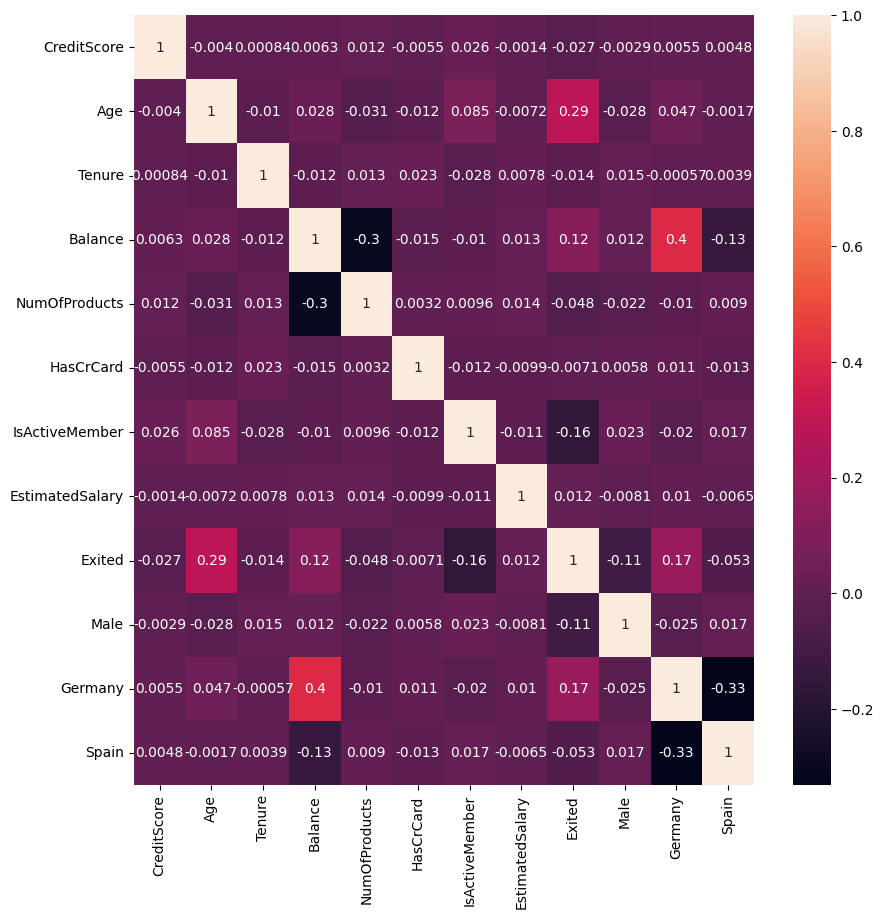

In [13]:
plt.figure(figsize=(10, 10))
dataplot = sb.heatmap(churn_df.corr(), annot=True)
plt.show()

As features não possuem uma alta correlação entre si, o que indica que todas podem ser utilizadas

## Separando treino e teste

In [14]:
X = churn_df.drop(columns=["Exited"])
Y = churn_df["Exited"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=55
)

## Undersampling

A base de dados é desbalanceada, desta forma será utilizado a tecnica de undersampling na classe majoritaria

In [15]:
undersample = RandomUnderSampler(sampling_strategy="majority", random_state=55)

In [16]:
X_train, Y_train = undersample.fit_resample(X_train, Y_train)

In [17]:
Y_train.value_counts()

0    1371
1    1371
Name: Exited, dtype: int64

## Escalonando os dados

In [18]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  

scaler.fit(X_train) 

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  


# Treinando Modelos

## Árvore de decisão

### Obtendo melhores hiperparâmetros

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_params = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,200]}
dt_model = DecisionTreeClassifier(random_state = 55)

clf = GridSearchCV(dt_model, tree_params, cv=5, n_jobs=-1,scoring = "f1")

In [20]:
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=55), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150, 200]},
             scoring='f1')

In [21]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 7}

### Treinando

In [22]:
dt_model = DecisionTreeClassifier(**clf.best_params_, random_state = 55)

dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=55)

In [23]:
Y_pred_dt = dt_model.predict(X_test)
Y_pred_dt_proba = dt_model.predict_proba(X_test)

In [24]:
print(classification_report(Y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2634
           1       0.44      0.74      0.55       666

    accuracy                           0.75      3300
   macro avg       0.68      0.75      0.69      3300
weighted avg       0.82      0.75      0.77      3300



## KNN

### Obtendo melhores hiperparâmetros

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {
    'n_neighbors' : range(1, 30),
    'weights': ['uniform', 'distance']
}

knn_model = KNeighborsClassifier()

clf = GridSearchCV(knn_model, knn_params, cv=5, n_jobs=-1,scoring = "f1")

In [26]:
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [27]:
clf.best_params_

{'n_neighbors': 24, 'weights': 'distance'}

### Treinando

In [28]:
knn_model = KNeighborsClassifier(**clf.best_params_)

knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24, weights='distance')

In [29]:
Y_pred_knn = knn_model.predict(X_test)
Y_pred_knn_proba = knn_model.predict_proba(X_test)

In [30]:
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      2634
           1       0.42      0.71      0.53       666

    accuracy                           0.75      3300
   macro avg       0.67      0.74      0.68      3300
weighted avg       0.81      0.75      0.77      3300



## Regressão logistica

### Obtendo melhores hiperparâmetros

In [31]:
from sklearn.linear_model import LogisticRegression
import numpy as np

lr_params = {
    'penalty' : ['l2'],
    'C' : np.logspace(-3,3,7),
    'solver' : ['newton-cholesky']
}

lr_model = LogisticRegression(random_state = 55)

clf = GridSearchCV(lr_model, lr_params, cv=5, n_jobs=-1, scoring = "f1")

In [32]:
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=55), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2'], 'solver': ['newton-cholesky']},
             scoring='f1')

In [33]:
clf.best_params_

{'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cholesky'}

### Obtendo melhores hiperparâmetros

In [34]:
lr_model = LogisticRegression(**clf.best_params_, random_state = 55)

lr_model.fit(X_train, Y_train)

LogisticRegression(C=10.0, random_state=55, solver='newton-cholesky')

In [35]:
Y_pred_lr = lr_model.predict(X_test)
Y_pred_lr_proba = lr_model.predict_proba(X_test)

In [36]:
print(classification_report(Y_test, Y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      2634
           1       0.39      0.72      0.50       666

    accuracy                           0.71      3300
   macro avg       0.65      0.72      0.65      3300
weighted avg       0.80      0.71      0.74      3300



## Rede Neural

### Obtendo melhores hiperparâmetros

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

mlp_params = {'solver': ['lbfgs', 'sgd', 'adam'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}

mlp_model = MLPClassifier()

clf = RandomizedSearchCV(mlp_model, mlp_params, cv=5, n_jobs=-1, scoring = "f1", n_iter=40)

In [38]:
clf.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=40, n_jobs=-1,
                   param_distributions={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                                        'hidden_layer_sizes': array([10, 11, 12, 13, 14]),
                                        'max_iter': [1000, 1100, 1200, 1300,
                                                     1400, 1500, 1600, 1700,
                                                     1800, 1900, 2000],
                                        'random_state': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   scoring='f1')

In [39]:
clf.best_params_

{'solver': 'adam',
 'random_state': 2,
 'max_iter': 1400,
 'hidden_layer_sizes': 12,
 'alpha': 0.0001}

### Treinando

In [40]:
mlp_model = MLPClassifier(**clf.best_params_)

mlp_model.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=12, max_iter=1400, random_state=2)

In [41]:
Y_pred_mlp = mlp_model.predict(X_test)
Y_pred_mlp_proba = mlp_model.predict_proba(X_test)

In [42]:
print(classification_report(Y_test, Y_pred_mlp))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      2634
           1       0.46      0.78      0.58       666

    accuracy                           0.77      3300
   macro avg       0.70      0.78      0.71      3300
weighted avg       0.84      0.77      0.79      3300



# Comparativo entre modelos

## Matriz de confusão

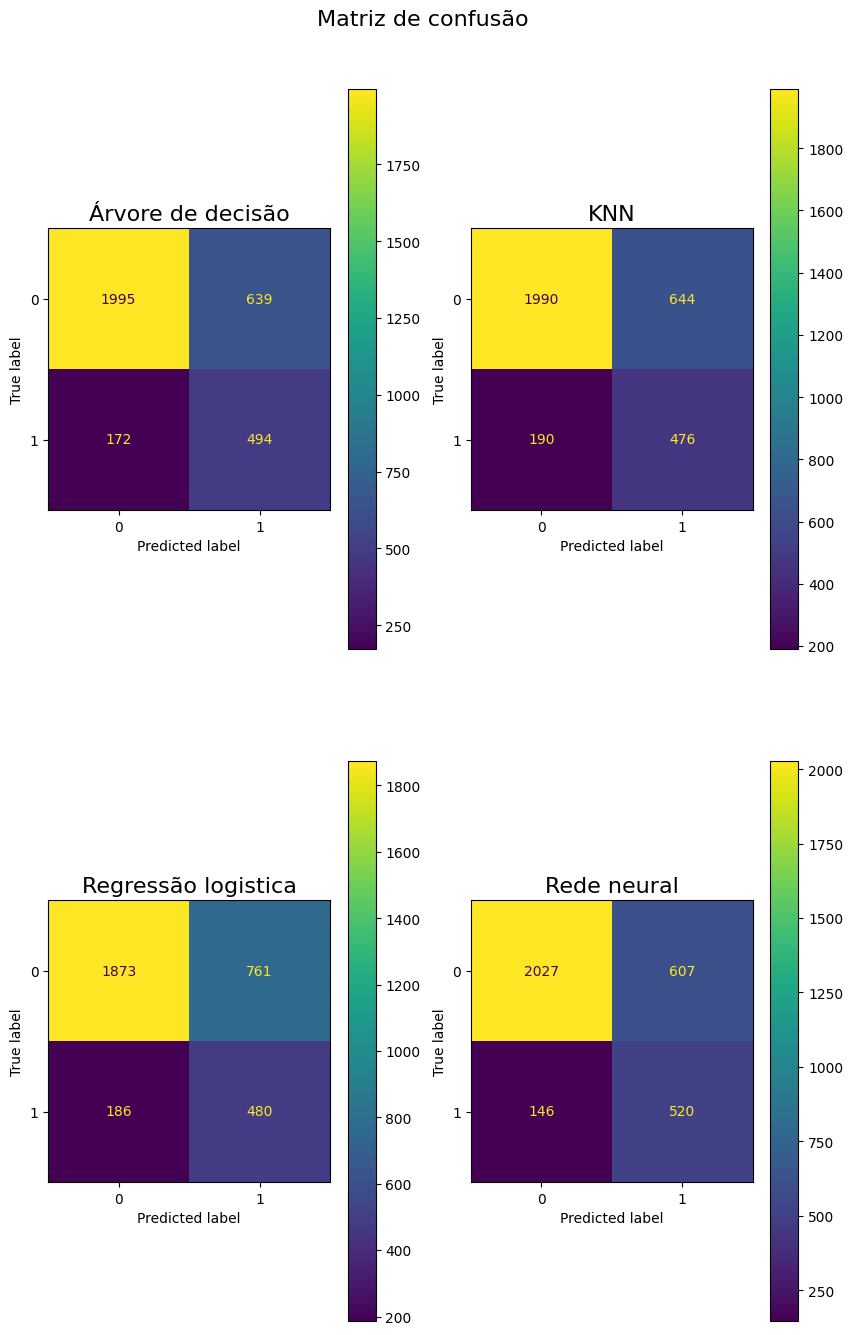

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

title_size = 16

f, axes = plt.subplots(2, 2, figsize=(10, 16))

axes[0, 0].set_title("Árvore de decisão", size=title_size)
cm = confusion_matrix(Y_test, Y_pred_dt, labels=dt_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(values_format='', ax=axes[0, 0])

axes[0, 1].set_title("KNN", size=title_size)
cm = confusion_matrix(Y_test, Y_pred_knn, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(values_format='', ax=axes[0, 1])

axes[1, 0].set_title("Regressão logistica", size=title_size)
cm = confusion_matrix(Y_test, Y_pred_lr, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(values_format='', ax=axes[1, 0])

axes[1, 1].set_title("Rede neural", size=title_size)
cm = confusion_matrix(Y_test, Y_pred_mlp, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot(values_format='',ax=axes[1, 1])

f.suptitle("Matriz de confusão", size=title_size, y=0.93)
plt.show()

## Curva ROC

<Figure size 640x480 with 0 Axes>

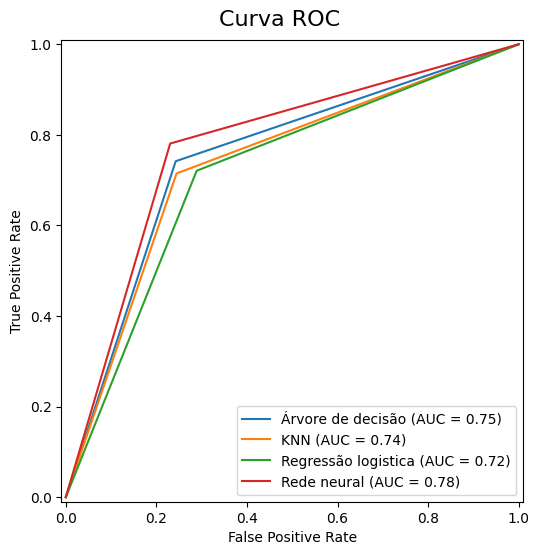

In [44]:
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

plt.clf()


fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_dt)
roc_auc = auc(fpr, tpr)
display_dt = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name = "Árvore de decisão")

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_knn)
roc_auc = auc(fpr, tpr)
display_knn = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name = "KNN")


fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_lr)
roc_auc = auc(fpr, tpr)
display_lr = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name = "Regressão logistica")


fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_mlp)
roc_auc = auc(fpr, tpr)
display_mlp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name = "Rede neural")


f = plt.figure(figsize=(10,6))
f.suptitle("Curva ROC", size=title_size, y=0.93)

ax = plt.gca()

display_dt.plot(ax=ax)
display_knn.plot(ax=ax)
display_lr.plot(ax=ax)
display_mlp.plot(ax=ax)

plt.show()

## Curva Precisão Recall

<Figure size 640x480 with 0 Axes>

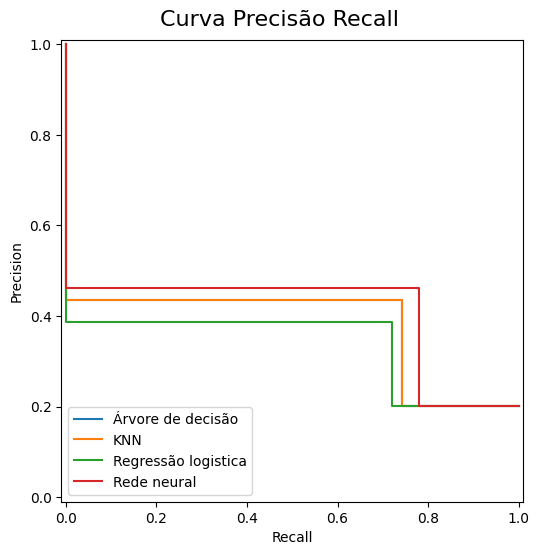

In [45]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

plt.clf()


precision, recall, _ = precision_recall_curve(Y_test, Y_pred_dt)
display_dt = PrecisionRecallDisplay(precision=precision, recall=recall,estimator_name = "Árvore de decisão")

fpr, tpr, thresholds = precision_recall_curve(Y_test, Y_pred_knn)
display_knn = PrecisionRecallDisplay(precision=precision, recall=recall,  estimator_name = "KNN")


precision, recall, _ = precision_recall_curve(Y_test, Y_pred_lr)
display_lr = PrecisionRecallDisplay(precision=precision, recall=recall,  estimator_name = "Regressão logistica")


precision, recall, _ = precision_recall_curve(Y_test, Y_pred_mlp)
display_mlp = PrecisionRecallDisplay(precision=precision, recall=recall,  estimator_name = "Rede neural")


f = plt.figure(figsize=(10,6))
f.suptitle("Curva Precisão Recall", size=title_size, y=0.93)

ax = plt.gca()

display_dt.plot(ax=ax)
display_knn.plot(ax=ax)
display_lr.plot(ax=ax)
display_mlp.plot(ax=ax)

plt.show()

# Incerteza

## Calculando a incerteza de cada modelo

In [46]:
import numpy as np

In [47]:
dt_inc = (1-np.amax(Y_pred_dt_proba, axis=1))
knn_inc = (1-np.amax(Y_pred_knn_proba, axis=1))
lr_inc = (1-np.amax(Y_pred_lr_proba, axis=1))
mlp_inc = (1-np.amax(Y_pred_mlp_proba, axis=1))

In [48]:
dt_inc_avg = dt_inc.mean()
knn_inc_avg = knn_inc.mean()
lr_inc_avg = lr_inc.mean()
mlp_inc_avg = mlp_inc.mean()

In [49]:
import pandas as pd

df = pd.DataFrame()

df["avg"] = [dt_inc_avg, knn_inc_avg, lr_inc_avg, mlp_inc_avg]
df["model"] = ["Árvore de decisão", "KNN", "Regressão logistica", "Rede Neural"] 

<Axes: xlabel='avg', ylabel='model'>

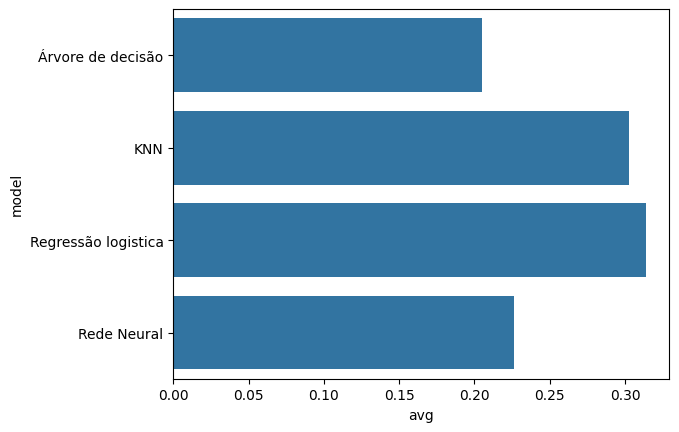

In [50]:
import seaborn as sns

sns.barplot(df, x="avg", y="model", legend=True)

## Analisando a incerteza

In [51]:
from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(X_test)

<Axes: xlabel='pca_1', ylabel='pca_2'>

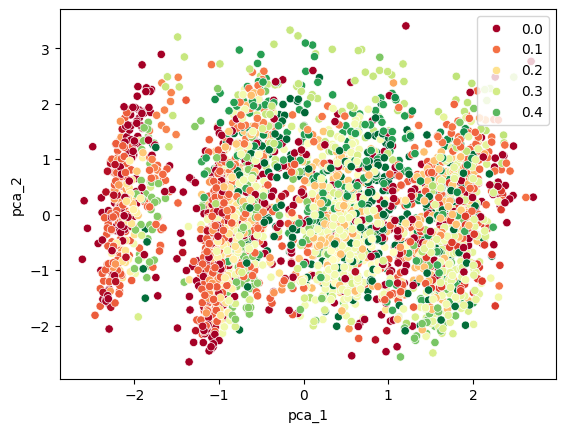

In [63]:
df = pd.DataFrame()
df["pca_1"] = Xt[:,0]
df["pca_2"] = Xt[:,1]

sns.scatterplot(data=df,x = "pca_1", y="pca_2",  hue=dt_inc , legend = "brief", palette='RdYlGn')

<Axes: xlabel='pca_1', ylabel='pca_2'>

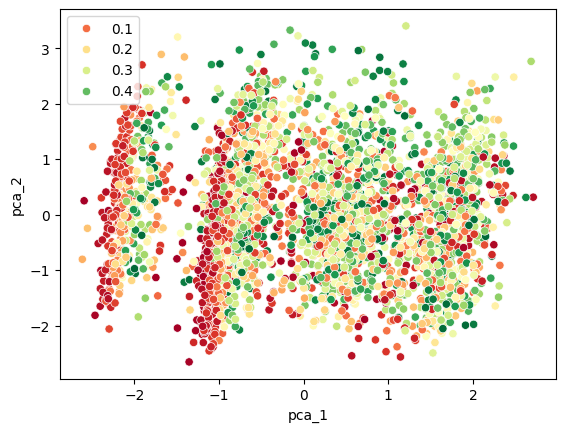

In [53]:
df = pd.DataFrame()
df["pca_1"] = Xt[:,0]
df["pca_2"] = Xt[:,1]

sns.scatterplot(data=df,x = "pca_1", y="pca_2",  hue=mlp_inc , legend = "brief", palette='RdYlGn')

<Axes: xlabel='pca_1', ylabel='pca_2'>

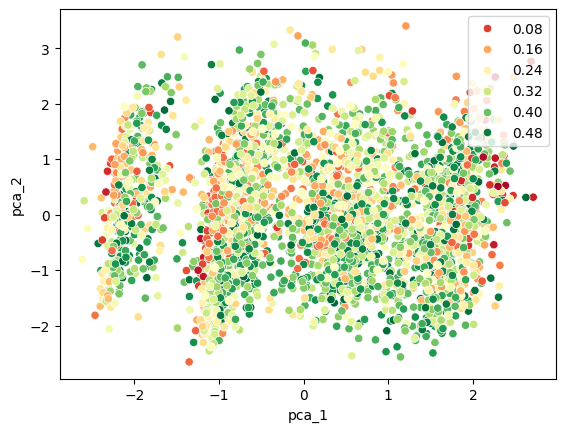

In [54]:
df = pd.DataFrame()
df["pca_1"] = Xt[:,0]
df["pca_2"] = Xt[:,1]

sns.scatterplot(data=df,x = "pca_1", y="pca_2",  hue=lr_inc , legend = "brief", palette='RdYlGn')

<Axes: xlabel='pca_1', ylabel='pca_2'>

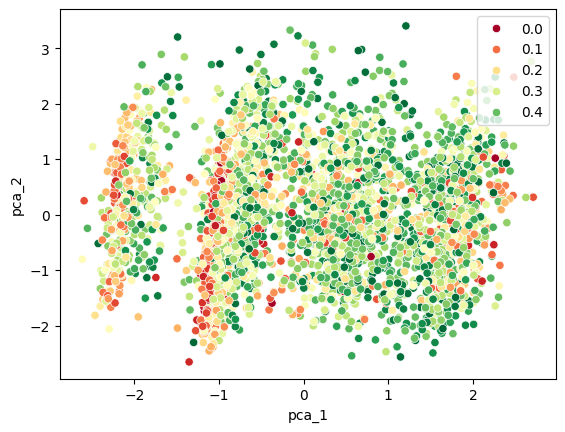

In [55]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame()
df["pca_1"] = Xt[:,0]
df["pca_2"] = Xt[:,1]


sns.scatterplot(data=df,x = "pca_1", y="pca_2",  hue=knn_inc,  palette ='RdYlGn' , legend = "brief")

<Axes: ylabel='Count'>

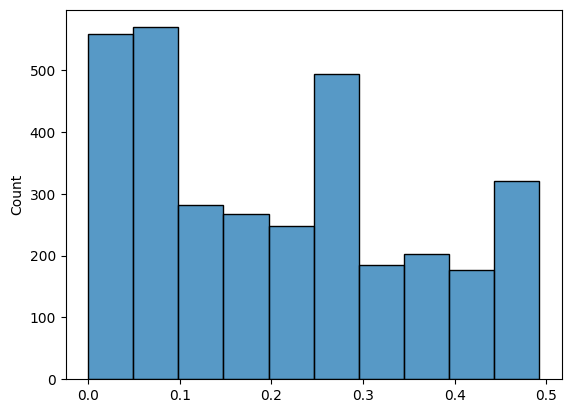

In [56]:
sns.histplot(data=dt_inc, bins=10)

<Axes: ylabel='Count'>

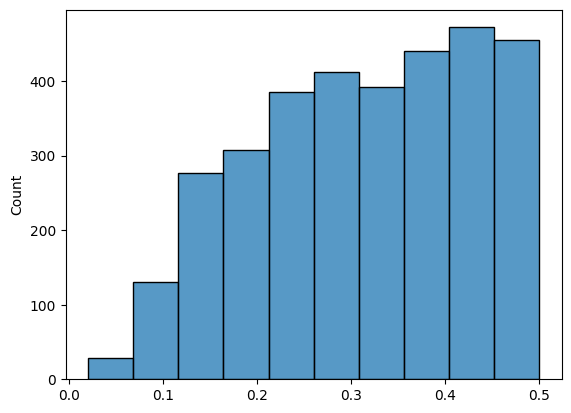

In [57]:
sns.histplot(data=lr_inc, bins=10)

<Axes: ylabel='Count'>

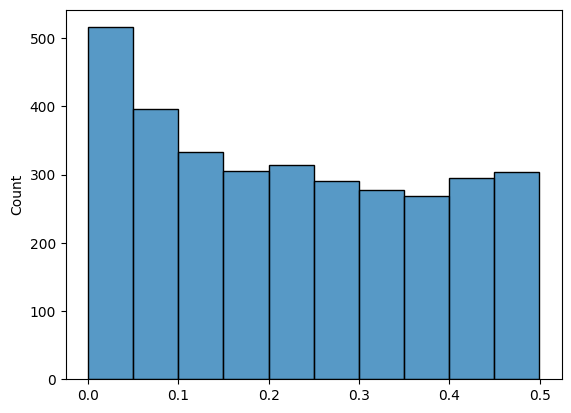

In [58]:
sns.histplot(data=mlp_inc, bins = 10)

<Axes: ylabel='Count'>

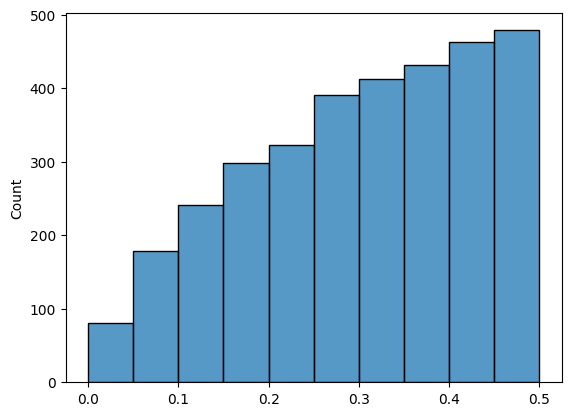

In [59]:
sns.histplot(data=knn_inc, bins = 10)

## Analisando a incerteza de cada instância 

In [60]:
all_inc_mean = []
all_inc_var = []

for i in range(len(X_test)):
    all_inc_mean.append(np.array([dt_inc[i], knn_inc[i], lr_inc[i], mlp_inc[i]]).mean())
    all_inc_var.append(np.array([dt_inc[i], knn_inc[i], lr_inc[i], mlp_inc[i]]).var())

In [61]:
inc_df = pd.DataFrame()

inc_df["arvore_inc"] = dt_inc
inc_df["knn_inc"] = knn_inc
inc_df["regressao_log_inc"] = lr_inc
inc_df["rede_neural_inc"] = mlp_inc

inc_df["aleatoria"] = all_inc_mean
inc_df["epistemica"] = all_inc_var

In [62]:
inc_df.sort_values(by = "epistemica", ascending = False)

arvore_inc   knn_inc  regressao_log_inc  rede_neural_inc  aleatoria  \
3228    0.000000  0.492608           0.474009         0.002618   0.242309   
2764    0.000000  0.492606           0.486333         0.016342   0.248820   
1631    0.000000  0.464858           0.488572         0.007694   0.240281   
734     0.000000  0.497097           0.444849         0.010550   0.238124   
2050    0.000000  0.499006           0.459889         0.042899   0.250448   
...          ...       ...                ...              ...        ...   
2532    0.174603  0.171730           0.162038         0.153125   0.165374   
1125    0.261628  0.256476           0.275864         0.256053   0.262505   
1564    0.174603  0.171794           0.157130         0.175100   0.169657   
2218    0.261628  0.280752           0.274845         0.266894   0.271030   
3284    0.432692  0.426804           0.431475         0.416365   0.426834   

      epistemica  
3228    0.058125  
2764    0.057950  
1631    0.055979  
734     0.054574  
2050    0.052862  
...          ...  
2532    0.000072  
1125    0.000064  
1564    0.000054  
2218    0.000054  
3284    0.000041  

[3300 rows x 6 columns]

In [64]:
inc_df.sort_values(by = "aleatoria", ascending = False)

arvore_inc   knn_inc  regressao_log_inc  rede_neural_inc  aleatoria  \
822     0.485714  0.495089           0.492245         0.462276   0.483831   
3078    0.492063  0.487951           0.457427         0.495362   0.483201   
2704    0.492063  0.455004           0.477653         0.498655   0.480844   
1433    0.454545  0.487329           0.483078         0.498123   0.480769   
2652    0.492063  0.471799           0.466398         0.488271   0.479633   
...          ...       ...                ...              ...        ...   
3048    0.000000  0.073233           0.032631         0.017297   0.030790   
2177    0.000000  0.035909           0.048375         0.010356   0.023660   
723     0.000000  0.000000           0.090210         0.000002   0.022553   
2390    0.000000  0.036813           0.045472         0.005114   0.021850   
3003    0.000000  0.000000           0.045817         0.014583   0.015100   

      epistemica  
822     0.000166  
3078    0.000228  
2704    0.000280  
1433    0.000259  
2652    0.000116  
...          ...  
3048    0.000734  
2177    0.000374  
723     0.001526  
2390    0.000385  
3003    0.000350  

[3300 rows x 6 columns]

In [66]:
from lime.lime_tabular import LimeTabularExplainer

In [69]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Male', 'Germany', 'Spain'],
      dtype='object')

In [70]:
cat = ["HasCrCard", "IsActiveMember", "Male", "Germany", "Spain"]

In [71]:
cat_idx = []

for idx, col in enumerate(X.columns):
    if col in cat:
        cat_idx.append(idx)

In [73]:
explainer = LimeTabularExplainer(
    training_data=X_train,
    mode="classification",
    training_labels=Y_train,
    feature_names=X.columns,
    categorical_features=cat_idx,
    random_state=42
)

In [79]:
i = 822
exp = explainer.explain_instance(X_test[i], dt_model.predict_proba, num_features = 15)
exp.show_in_notebook()

In [80]:
i = 822
exp = explainer.explain_instance(X_test[i], lr_model.predict_proba, num_features = 15)
exp.show_in_notebook()

In [81]:
i = 822
exp = explainer.explain_instance(X_test[i], knn_model.predict_proba, num_features = 15)
exp.show_in_notebook()

In [84]:
i = 822
exp = explainer.explain_instance(X_test[i], mlp_model.predict_proba, num_features = 15)
exp.show_in_notebook()